# Practical work 08 - Clustering

## Imports

In [583]:
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

## Exercise 1 - Getting the data

a) Load the two given datasets:

In [584]:
fichier1 = open("dataset_1.pkl", "rb")
data1, label1 = pickle.load(fichier1, encoding="latin1")
fichier1.close()

fichier2 = open("dataset_2.pkl", "rb")
data2, label2 = pickle.load(fichier2, encoding="latin1")
fichier2.close()

b) Visualize the data using various color for each unique labels

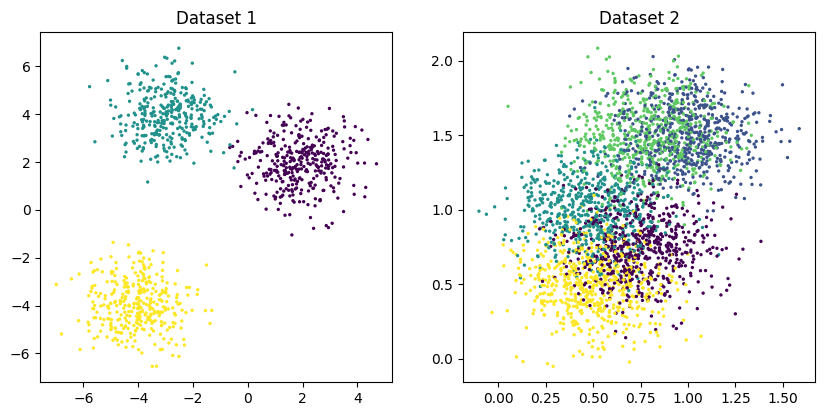

In [585]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.scatter(data1[:, 0], data1[:, 1], c=label1, s=2)
plt.title("Dataset 1")

plt.subplot(2, 2, 2)
plt.scatter(data2[:, 0], data2[:, 1], c=label2, s=2)
plt.title("Dataset 2")

plt.show()

## Exercise 2 - The $k$-means algorithm

a) Initialise the centroids $\mu_1, \mu_2, ... , \mu_K$

In [586]:
import random

#initialise aléatoirement k centroïdes avec datasert
def init_centroides(donnees, k):
    
    # bornes min et max 
    min_x, max_x = np.min(donnees[:, 0]), np.max(donnees[:, 0])
    min_y, max_y = np.min(donnees[:, 1]), np.max(donnees[:, 1])

    centroides = []

    for _ in range(k):
        x = round(random.uniform(min_x, max_x), 2)
        y = round(random.uniform(min_y, max_y), 2)
        centroides.append([x, y])

    return np.array(centroides)

b) Until convergence :

<span style="margin-left: 20px;">i) Find the closest centroid for each point</span>

In [587]:
# trouve le centroïde le plus proche d'un point donné
def find_centroide_closest(point, centroides):
    # calcul des distances entre le point et chaque centroïde
    distances = []
    for c in centroides:
        d = np.linalg.norm(point - c)
        distances.append(d)
    
    # cherche la plus petite distance
    index_proche = int(np.argmin(distances))
    
    return index_proche

<span style="margin-left: 20px;">ii) Reevaluate the centroids</span>

In [588]:
def reevaluate_centroids(data, k, centroids, convergence_criteria):    
    max_delta = 9999.0
    
    current_centroids = np.copy(centroids)
    criteria_values = []
    labels = np.zeros(data.shape[0], dtype=int)
    
    while max_delta > convergence_criteria:
        old_centroids = np.copy(current_centroids)
        
        # assignation des points au centroïde le plus proche
        closest_indices = []
        for point in data:
            idx = find_centroide_closest(point, current_centroids)
            closest_indices.append(idx)
        closest_indices = np.array(closest_indices, dtype=int)
        
        labels[:] = closest_indices
        
        # recalcul des centroïdes à partir des points assignés
        for j in range(k):
            points_cluster = data[closest_indices == j]
            mean_x = np.mean(points_cluster[:, 0])
            mean_y = np.mean(points_cluster[:, 1])
            current_centroids[j] = (mean_x, mean_y)
        
        # calcul du déplacement maximal entre anciens et nouveaux centroïdes
        deltas = current_centroids - old_centroids
        distances = np.linalg.norm(deltas, axis=1)
        max_delta = np.max(distances)
        criteria_values.append(max_delta)
    
    return current_centroids, np.array(criteria_values), labels

c) Return the $k$ centroids.

In [589]:
k = 3
convergence_criteria = 0.05

centroids = init_centroides(data1, k)
centroids, convergence_values, labels = reevaluate_centroids(
    data1, k, centroids, convergence_criteria
)

print("Centroïdes finaux :")
print(centroids)


Centroïdes finaux :
[[-4.0425738  -3.95057821]
 [-2.94162002  3.95874652]
 [ 1.90465205  1.96816542]]


We also ask you to define and implement strategies for the :

* Initialisation of the centroids.
* Convergence criteria.

## Exercise 3 - Evaluate your model

Run your algorithm with the dataset 1.

In [590]:
k = 3
convergence_criteria = 0.00005

centroids = init_centroides(data1, k)
centroids, convergence_values, labels = reevaluate_centroids(
    data1, k, centroids, convergence_criteria
)

print("Centroïdes finaux :")
print(centroids)


Centroïdes finaux :
[[-4.0425738  -3.95057821]
 [-2.94851563  3.96283241]
 [ 1.89702162  1.97006469]]


Visualize your convergence criteria over the epochs using the dataset 1.

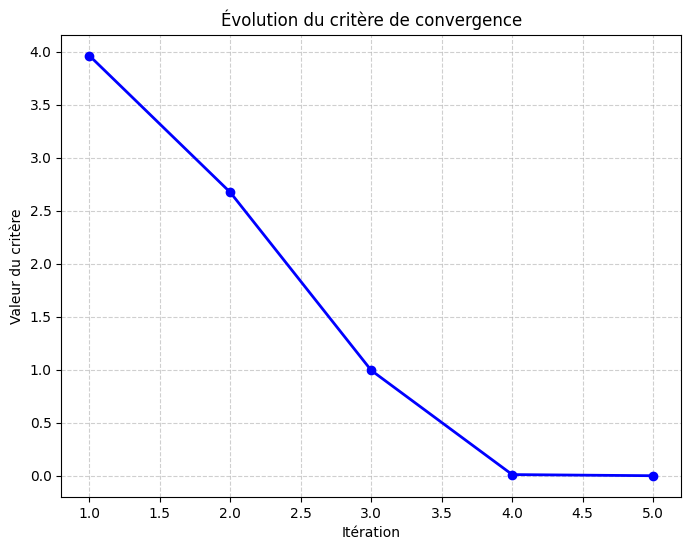

In [591]:
def plot_convergence_values(convergence_values):

    plt.figure(figsize=(8, 6))
    iterations = np.arange(1, len(convergence_values) + 1)

    plt.plot(iterations, convergence_values, 'bo-', linewidth=2, markersize=6)
    plt.xlabel('Itération')
    plt.ylabel('Valeur du critère')
    plt.title('Évolution du critère de convergence')

    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.show()

plot_convergence_values(convergence_values)

Visualize the output of your $k$-means on the dataset 1.

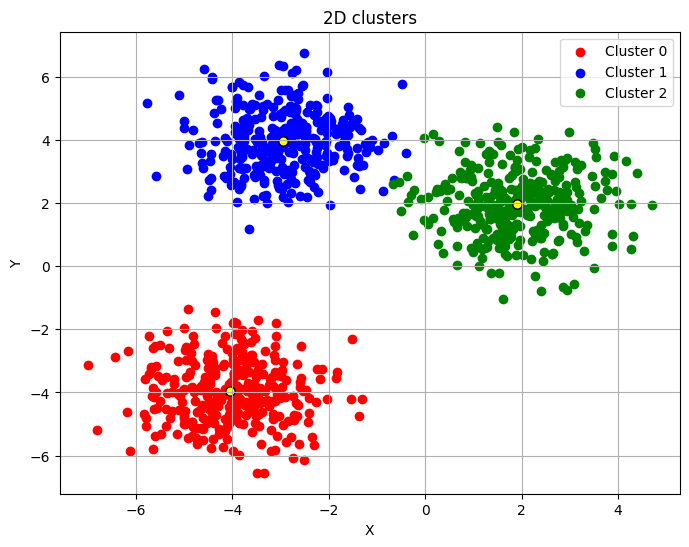

In [592]:
def plot_kmeans(data, labels, centroids):
    plt.figure(figsize=(8, 6))
    # pour gérer plus de clusters
    couleurs = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

    classes = list(set(labels))

    for i in range(len(classes)):
        classe = classes[i]
        indices = np.where(labels == classe)
        points = data[indices]  
        plt.scatter(
            points[:, 0],
            points[:, 1],
            color=couleurs[i % len(couleurs)],
            marker='o',
            label=f'Cluster {classe}'
        )

    for c in centroids:
        plt.scatter(
            c[0], c[1],
            color='yellow',
            marker='.',
            s=180,
            edgecolors='black'
        )

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D clusters')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_kmeans(data1, labels, centroids)

Do you experience sensitivity to the initial values of the centroids? Is your strategy for initialization working well in most cases?

Non, à chaque test, on a réussi à trouver les centroïdes optimaux. Ça veut dire que notre façon de les initialiser marche plutôt bien. En fait, on a simplement choisi de placer les centroïdes au hasard entre les valeurs minimum et maximum des données, ce qui fait qu’ils sont toujours dans la même zone que nos points.

Document your convergence criteria. Could you think about other convergence criteria?

Comme critère de convergence, nous avons défini un seuil minimal basé sur le plus grand déplacement (delta) entre les centroïdes mis à jour et ceux de l’itération précédente. Autrement dit, on prend le plus grand delta pour s’assurer que même le centroïde le plus lent à bouger ait atteint la convergence. 

En comparant chaque nouveau centroïde à sa position précédente, on peut vérifier que tous les centroïdes se stabilisent. Une fois que ce seuil est atteint, on peut considérer que les centroïdes ont atteint leur position optimale ou qu’ils ne se déplaceront plus de façon importante.


Un autre critère possible serait de vérifier si les affectations des points ne changent plus d’une itération à l’autre. 
Cependant, ce critère peut être risqué si le jeu de données est trop petit. Une autre approche consisterait à suivre la distorsion et à arrêter l’algorithme lorsque sa diminution devient très faible, ce qui montre que le regroupement ne s’améliore plus vraiment.

Run your algorithm with the dataset 2.

In [593]:
# Your code here
k2 = 5
convergence_criteria2 = 0.00005

centroids2 = init_centroides(data2, k2)
centroids2, convergence_values2, labels2 = reevaluate_centroids(
    data2, k2, centroids2, convergence_criteria2
)

print("Centroïdes finaux :")
print(centroids2)

Centroïdes finaux :
[[0.6904568  1.46318578]
 [1.04846045 1.5317603 ]
 [0.42189648 0.9715736 ]
 [0.50766229 0.45905044]
 [0.82156696 0.78281343]]


Visualize your convergence criteria over time using the dataset 2.

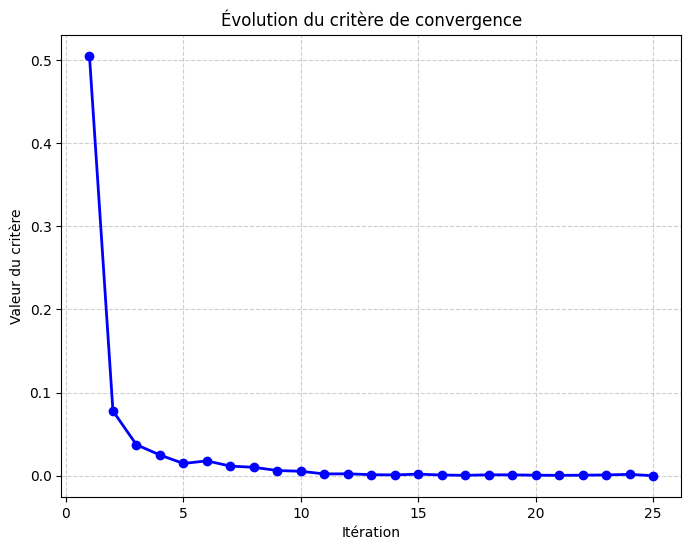

In [594]:
plot_convergence_values(convergence_values2)

Visualize the output of your $k$-means on the dataset 2 and comment your results.

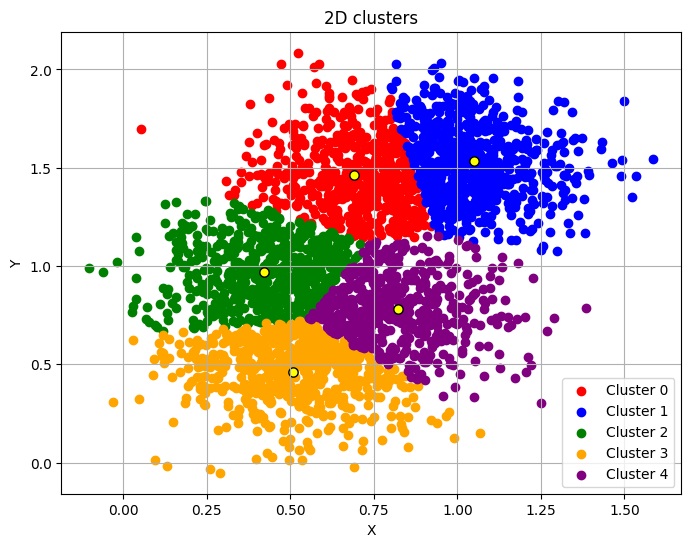

In [595]:
plot_kmeans(data2, labels2, centroids2)

Nous avons pu identifier les trois classes du premier ensemble de données sans difficulté, car elles sont bien distinctes les unes des autres. Même sans connaître à l’avance le nombre de classes, on peut facilement les distinguer sur le graphique.

Par contre le second dataset est plus complexe, car les points y sont partiellement mélangés. Même avec notre implémentation, il a été difficile de déterminer qu’il existait réellement cinq classes. Nous avons donc choisi de fixer k = 5, en nous appuyant sur les étiquettes fournies. 

Notre méthode permet d’estimer la position centrale de chaque groupe, mais il reste compliqué d’obtenir une classification vraiment fiable pour de futurs jeux de données avec ce modèle.

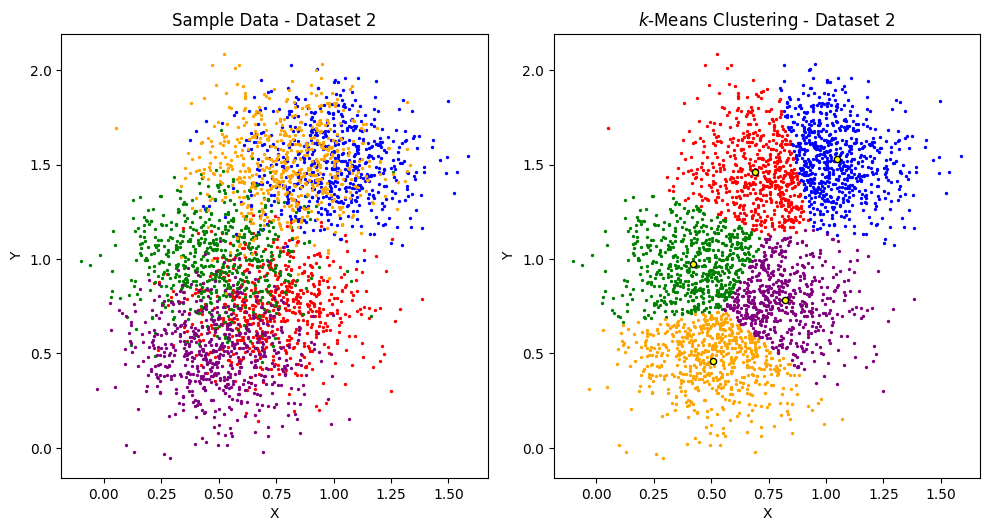

In [602]:
couleurs = ['red', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
classes_reelles = list(set(label2))
for i, classe in enumerate(classes_reelles):
    indices = np.where(label2 == classe)
    points = data2[indices]
    plt.scatter(points[:, 0], points[:, 1],
                color=couleurs[i % len(couleurs)], s=2)
plt.title("Sample Data - Dataset 2")
plt.xlabel("X")
plt.ylabel("Y")


plt.subplot(2, 2, 2)

classes_calculees = list(set(labels2))
for i, classe in enumerate(classes_calculees):
    indices = np.where(labels2 == classe)
    points = data2[indices]
    plt.scatter(points[:, 0], points[:, 1],
                color=couleurs[i % len(couleurs)], s=2)

plt.scatter(
    centroids2[:, 0],
    centroids2[:, 1],
    color='yellow',
    marker='.',
    s=80,
    edgecolors='black'
)
plt.title("$k$-Means Clustering - Dataset 2")
plt.xlabel("X")
plt.ylabel("Y")

plt.tight_layout()
plt.show()

On peut voir sur le plot ci-dessus que la séparation entre les différentes classes du deuxième ensemble de données est complexe. Les points de plusieurs groupes se chevauchent partiellement, ce qui rend la distinction entre les classes moins évidente.

Même si l’algorithme k-means parvient à identifier cinq regroupements principaux, certains d’entre eux restent proches ou mélangés. Cela montre bien la difficulté du clustering sur des données où les frontières entre classes ne sont pas clairement définies.